In [321]:
import numpy as np
import matplotlib.pyplot as plt
import torch

Predictin tempretures:
\begin{align} 
    t_c &: celsius \\
    t_u &: unknown units
\end{align}

In [322]:
# Data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [323]:
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [324]:
def model(t_u, w, b):
    return w * t_u + b

def loss_f(t_p, t_c):
    squared_difference = (t_p - t_c)**2
    return squared_difference.mean()

def gradient(alpha, t_p, t_c, t_u, w, b):
    dw = 2 * ((t_p - t_c) * t_u).mean()
    db = 2 * (t_p - t_c).mean()
    
    w = w - alpha * dw
    b = b - alpha * db
    return w, b


In [325]:
w = torch.ones(())
b = torch.zeros(())

In [326]:
epoch = 5000

t_un = 0.1* t_u 

for i in range(epoch+1):
    t_p = model(t_un, w, b)
    loss = loss_f(t_p, t_c)
    w, b = gradient(0.01, t_p, t_c, t_un, w , b)
    if i%100 == 0:
        print("Epoch", i, loss.item())


Epoch 0 80.36434173583984
Epoch 100 22.083463668823242
Epoch 200 16.56162452697754
Epoch 300 12.631514549255371
Epoch 400 9.834280014038086
Epoch 500 7.843372821807861
Epoch 600 6.426368236541748
Epoch 700 5.4178266525268555
Epoch 800 4.700008869171143
Epoch 900 4.189108371734619
Epoch 1000 3.8254828453063965
Epoch 1100 3.5666725635528564
Epoch 1200 3.3824667930603027
Epoch 1300 3.251361608505249
Epoch 1400 3.1580464839935303
Epoch 1500 3.091630458831787
Epoch 1600 3.0443613529205322
Epoch 1700 3.01071834564209
Epoch 1800 2.98677134513855
Epoch 1900 2.9697272777557373
Epoch 2000 2.9575960636138916
Epoch 2100 2.9489617347717285
Epoch 2200 2.9428184032440186
Epoch 2300 2.938443899154663
Epoch 2400 2.9353315830230713
Epoch 2500 2.9331159591674805
Epoch 2600 2.9315383434295654
Epoch 2700 2.9304163455963135
Epoch 2800 2.929619789123535
Epoch 2900 2.9290504455566406
Epoch 3000 2.9286458492279053
Epoch 3100 2.928356409072876
Epoch 3200 2.9281516075134277
Epoch 3300 2.9280073642730713
Epoch 34

In [327]:
print("w:", w, "\nb:", b)

w: tensor(5.3671) 
b: tensor(-17.3012)


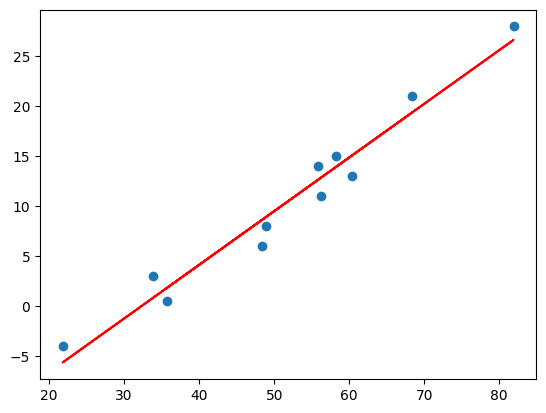

In [328]:
plt.scatter(t_u, t_c)

y_axis = model(t_un, w, b )

plt.plot(t_u, y_axis.detach(), color="r") # detach() function "requires_grad=True" yu tensorden kaldırır.

In [329]:
# -----------------APPLYING AUTOGRAD --------------------

params = torch.tensor([1.0, 0.0], requires_grad=True)

In [330]:
epoch = 5000

for i in range(epoch+1):
    if params.grad is not None:
        # türevi alınacak değişkenin başlangıçta params.grad değeri None olduğundan onu sıfır yapıyoruz.
        params.grad.zero_()

    loss = loss_f(model(t_un, *params), t_c)
    loss.backward()

    with torch.no_grad():
        params -= 0.01 * params.grad
    if i%500 == 0:
        print("Epoch", i, loss.item())

Epoch 0 80.36434173583984
Epoch 500 7.843369007110596
Epoch 1000 3.8254828453063965
Epoch 1500 3.091630458831787
Epoch 2000 2.9575960636138916
Epoch 2500 2.9331159591674805
Epoch 3000 2.9286458492279053
Epoch 3500 2.9278290271759033
Epoch 4000 2.9276793003082275
Epoch 4500 2.927651882171631
Epoch 5000 2.9276480674743652


In [331]:
params

tensor([  5.3671, -17.3012], requires_grad=True)

In [332]:
# ----------------- Different OPTIMIZERS ----------------

epoch = 2000

params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = torch.optim.Adam([params], lr=0.1)

for i in range(1, epoch+1):

    loss = loss_f(model(t_un, *params), t_c)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i%500 == 0:
        print("Epoch", i, loss.item())

Epoch 500 2.962301731109619
Epoch 1000 2.9276468753814697
Epoch 1500 2.927645206451416
Epoch 2000 2.927645683288574


In [333]:
params

tensor([  5.3677, -17.3048], requires_grad=True)

In [334]:
# --------- Splitting trainig set and validation set in pytorch using torch.randperm

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 8,  3, 10,  9,  4,  6,  7,  2,  5]), tensor([0, 1]))

In [335]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u # for like normalizing the input 
val_t_un = 0.1 * val_t_u

In [336]:
epoch = 3000

params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = torch.optim.SGD([params], lr=0.01)

for i in range(1, epoch+1):

    train_t_p = model(train_t_un , *params)
    train_loss = loss_f(train_t_p, train_t_c)
    
    val_t_p = model(val_t_un, *params)
    val_loss = loss_f(val_t_p, val_t_c)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if i <= 3 or i%500 == 0:
        print("Epoch", i, "----> train_loss: {:.6f}  and  val_loss: {:.6f}".format(train_loss.item(),val_loss.item()))

Epoch 1 ----> train_loss: 89.317192  and  val_loss: 40.076500
Epoch 2 ----> train_loss: 37.020512  and  val_loss: 25.680187
Epoch 3 ----> train_loss: 30.137739  and  val_loss: 29.044710
Epoch 500 ----> train_loss: 7.632429  and  val_loss: 9.656914
Epoch 1000 ----> train_loss: 3.917658  and  val_loss: 4.302538
Epoch 1500 ----> train_loss: 3.283683  and  val_loss: 2.842324
Epoch 2000 ----> train_loss: 3.175485  and  val_loss: 2.367376
Epoch 2500 ----> train_loss: 3.157022  and  val_loss: 2.193076
Epoch 3000 ----> train_loss: 3.153872  and  val_loss: 2.124806


However optimized, building the autograd graph comes with additional costs that we
could totally forgo during the validation pass, especially when the model has millions
of parameters.

In order to address this, PyTorch allows us to switch off autograd when we don’t
need it, using the torch.no_grad context manager.12 We won’t see any meaningful
advantage in terms of speed or memory consumption on our small problem. However,
for larger models, the differences can add up. We can make sure this works by
checking the value of the requires_grad attribute on the val_loss tensor:

In [337]:
epoch = 3000

params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = torch.optim.SGD([params], lr=0.01)

for i in range(1, epoch+1):

    train_t_p = model(train_t_un , *params)
    train_loss = loss_f(train_t_p, train_t_c)
    
    with torch.no_grad():
        val_t_p = model(val_t_un, *params)
        val_loss = loss_f(val_t_p, val_t_c)
        assert val_loss.requires_grad==False  # Checks that our output requires_grad args are forced to False inside this block

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if i <= 3 or i%500 == 0:
        print("Epoch", i, "----> train_loss: {:.6f}  and  val_loss: {:.6f}".format(train_loss.item(),val_loss.item()))

Epoch 1 ----> train_loss: 89.317192  and  val_loss: 40.076500
Epoch 2 ----> train_loss: 37.020512  and  val_loss: 25.680187
Epoch 3 ----> train_loss: 30.137739  and  val_loss: 29.044710
Epoch 500 ----> train_loss: 7.632429  and  val_loss: 9.656914
Epoch 1000 ----> train_loss: 3.917658  and  val_loss: 4.302538
Epoch 1500 ----> train_loss: 3.283683  and  val_loss: 2.842324
Epoch 2000 ----> train_loss: 3.175485  and  val_loss: 2.367376
Epoch 2500 ----> train_loss: 3.157022  and  val_loss: 2.193076
Epoch 3000 ----> train_loss: 3.153872  and  val_loss: 2.124806
